# A Predictive Analysis of Food Nutrient Density Code Document

## David Berberena

## 9/22/2024

### Library and Dataset Importation

In [1]:
# I will import the necessary libraries needed for data mining, exploratory data analysis, and data preparation here.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.base import BaseEstimator, RegressorMixin
import statsmodels.api as sm
import warnings

warnings.filterwarnings('ignore')

In [2]:
# I will read in each dataset and display them individually using the head() function.

nutrition_data1 = 'https://raw.githubusercontent.com/SosukeAizen5/Portfolio/main/DSC%20680%20Applied%20Data%20Science/FOOD-DATA-GROUP1.csv'

nutrition_1 = pd.read_csv(nutrition_data1)

nutrition_1.head()

,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,0,0,cream cheese,51,5.0,2.9,1.3,0.200,0.8,0.500,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070
1,1,1,neufchatel cheese,215,19.4,10.9,4.9,0.800,3.1,2.700,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100
2,2,2,requeijao cremoso light catupiry,49,3.6,2.3,0.9,0.000,0.9,3.400,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400
3,3,3,ricotta cheese,30,2.0,1.3,0.5,0.002,1.5,0.091,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,4,4,cream cheese low fat,30,2.3,1.4,0.6,0.042,1.2,0.900,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007


In [3]:
# The second dataset:

nutrition_data2 = 'https://raw.githubusercontent.com/SosukeAizen5/Portfolio/main/DSC%20680%20Applied%20Data%20Science/FOOD-DATA-GROUP2.csv'

nutrition_2 = pd.read_csv(nutrition_data2)

nutrition_2.head()

,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,0,0,eggnog,224,10.6,6.6,3.3,0.5,20.4,20.4,...,330.2,0.051,0.500,48.3,0.024,276.9,419.1,0.094,1.200,377.200
1,1,1,beer light,96,0.0,0.0,0.0,0.0,5.4,0.3,...,13.2,0.095,0.014,16.5,0.094,39.6,69.3,0.077,0.044,19.456
2,2,2,beer budweiser,12,0.0,0.0,0.0,0.0,0.9,0.0,...,1.2,0.095,0.000,2.1,0.038,3.8,9.7,0.000,0.000,2.200
3,3,3,weizenbier erdinger,220,18.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000,18.000
4,4,4,beer light budweiser,9,0.0,0.0,0.0,0.0,0.4,0.0,...,0.9,0.088,0.000,2.1,0.007,3.2,7.7,0.000,0.000,1.320


In [4]:
# I wish to merge the five datasets, yet I must check if each dataset is recognized by Python as having the same columns as 
# the previous dataset. I have created a simple if-else statement to prove this by using the columns.all() function.

if nutrition_1.columns.all() == nutrition_2.columns.all():
    print("The datasets' columns are the same")
else:
    print("The datasets' columns are different")

The datasets' columns are the same


In [5]:
# The third dataset:

nutrition_data3 = 'https://raw.githubusercontent.com/SosukeAizen5/Portfolio/main/DSC%20680%20Applied%20Data%20Science/FOOD-DATA-GROUP3.csv'

nutrition_3 = pd.read_csv(nutrition_data3)

nutrition_3.head()

,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,0,0,nectarine,66,0.500,0.066,0.100,0.200,15.8,11.8,...,0.081,9.000,0.100,0.4,13.500,0.002,39.0,301.500,0.000,20.735
1,1,1,kiwifruit gold,51,0.200,0.008,0.099,0.051,12.8,10.0,...,13.800,0.100,0.200,9.7,0.072,20.300,255.2,0.003,0.077,159.686
2,2,2,prickly pear raw,8,0.072,0.000,0.000,0.000,1.9,0.2,...,34.200,0.051,0.021,13.1,0.100,2.100,24.7,0.023,0.073,39.263
3,3,3,pineapple,45,0.100,0.074,0.001,0.087,11.8,8.9,...,0.061,11.700,0.091,0.3,10.800,0.800,7.2,98.100,0.061,13.970
4,4,4,rowan,253,4.600,0.600,0.000,0.000,54.5,32.1,...,34.200,2.400,5.000,73.0,0.400,118.600,298.7,0.000,1.000,176.400


In [6]:
# Statement checking the columns in each dataset is here.

if nutrition_2.columns.all() == nutrition_3.columns.all():
    print("The datasets' columns are the same")
else:
    print("The datasets' columns are different")

The datasets' columns are the same


In [7]:
# The fourth dataset:

nutrition_data4 = 'https://raw.githubusercontent.com/SosukeAizen5/Portfolio/main/DSC%20680%20Applied%20Data%20Science/FOOD-DATA-GROUP4.csv'

nutrition_4 = pd.read_csv(nutrition_data4)

nutrition_4.head()

,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,0,0,chocolate pudding fat free,105,0.3,0.0,0.00,0.000,23.6,17.8,...,44.100,0.035,1.900,17.0,0.040,61.0,235.0,0.052,0.300,72.400
1,1,1,tapioca pudding,143,4.3,1.1,2.80,0.088,23.9,16.4,...,78.100,0.026,0.100,6.6,0.096,66.0,101.2,0.000,0.200,108.800
2,2,2,tapioca pudding fat free,105,0.4,0.1,0.08,0.067,23.9,15.9,...,58.200,0.004,0.100,5.6,0.023,73.9,78.4,0.000,0.200,84.500
3,3,3,rice pudding,122,2.4,1.4,0.60,0.100,20.8,13.1,...,0.063,107.400,0.014,0.1,9.000,0.1,92.7,141.300,0.083,27.329
4,4,4,corn pudding,328,12.6,6.3,3.90,1.400,42.4,16.5,...,0.066,97.500,0.100,1.3,37.500,0.2,225.0,440.000,0.069,69.795


In [8]:
# Statement checking the columns in each dataset is here.

if nutrition_3.columns.all() == nutrition_4.columns.all():
    print("The datasets' columns are the same")
else:
    print("The datasets' columns are different")

The datasets' columns are the same


In [9]:
# The fifth dataset:

nutrition_data5 = 'https://raw.githubusercontent.com/SosukeAizen5/Portfolio/main/DSC%20680%20Applied%20Data%20Science/FOOD-DATA-GROUP5.csv'

nutrition_5 = pd.read_csv(nutrition_data5)

nutrition_5.head()

,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,0,0,margarine with yoghurt,88,9.8,1.9,5.6,2.0,0.073,0.0,...,2.8,0.001,0.027,0.3,0.0,2.2,3.5,0.000,0.008,12.971
1,1,1,sunflower seed butter,99,8.8,0.7,6.2,1.6,3.700,1.7,...,10.2,0.300,0.700,49.8,0.3,106.6,92.2,0.075,0.800,27.500
2,2,2,hazelnut oil,120,13.6,1.0,10.6,1.4,0.000,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,13.600
3,3,3,menhaden fish oil,1966,218.0,66.3,58.2,74.5,0.000,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,218.000
4,4,4,cod liver fish oil,123,13.6,3.1,6.4,3.1,0.000,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,17.700


In [10]:
# Statement checking the columns in each dataset is here.

if nutrition_4.columns.all() == nutrition_5.columns.all():
    print("The datasets' columns are the same")
else:
    print("The datasets' columns are different")

The datasets' columns are the same


In [11]:
# Now that I have verified the columns in each dataset to be the same, I will print each dataset's number of observations to
# ensure that when the datasets are merged, the number of observations in the final dataset will be the same as the total 
# observations of all five datasets.

nutrition_total_observations = (nutrition_1.shape[0] + nutrition_2.shape[0] 
                                + nutrition_3.shape[0]) + (nutrition_4.shape[0] + nutrition_5.shape[0])

print('The number of food ingredients in the first dataset is', nutrition_1.shape[0])
print('The number of food ingredients in the second dataset is', nutrition_2.shape[0])
print('The number of food ingredients in the third dataset is', nutrition_3.shape[0])
print('The number of food ingredients in the fourth dataset is', nutrition_4.shape[0])
print('The number of food ingredients in the fifth dataset is', nutrition_5.shape[0])
print('The total number of observations across all five datasets is', nutrition_total_observations)

The number of food ingredients in the first dataset is 551
The number of food ingredients in the second dataset is 319
The number of food ingredients in the third dataset is 571
The number of food ingredients in the fourth dataset is 232
The number of food ingredients in the fifth dataset is 722
The total number of observations across all five datasets is 2395


### Data Preparation

In [12]:
# I will merge the datasets by stacking them on top of one another vertically with the pd.concat() function.

food_nutrition = pd.concat([nutrition_1, nutrition_2, nutrition_3, nutrition_4, nutrition_5], ignore_index = True)

# I will confirm that the merged dataset contains the same number of observations as the five separate datasets with an 
# if-else statement.

if nutrition_total_observations == food_nutrition.shape[0]:
    print('The number of observations for both the total of all five datasets and the merged dataset are the same')
else:
    print('The number of observations are not the same')

The number of observations for both the total of all five datasets and the merged dataset are the same


In [13]:
# Here is the first few observations of the merged dataset using head().

food_nutrition.head()

,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,0,0,cream cheese,51,5.0,2.9,1.3,0.200,0.8,0.500,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070
1,1,1,neufchatel cheese,215,19.4,10.9,4.9,0.800,3.1,2.700,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100
2,2,2,requeijao cremoso light catupiry,49,3.6,2.3,0.9,0.000,0.9,3.400,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400
3,3,3,ricotta cheese,30,2.0,1.3,0.5,0.002,1.5,0.091,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,4,4,cream cheese low fat,30,2.3,1.4,0.6,0.042,1.2,0.900,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007


In [14]:
# There are two columns that have no relevance to the dataset as a whole, so I will drop them using the drop() function. 

food_nutrition = food_nutrition.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1)

food_nutrition.head()

,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,cream cheese,51,5.0,2.9,1.3,0.200,0.8,0.500,0.9,0.0,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070
1,neufchatel cheese,215,19.4,10.9,4.9,0.800,3.1,2.700,7.8,0.0,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100
2,requeijao cremoso light catupiry,49,3.6,2.3,0.9,0.000,0.9,3.400,0.8,0.1,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400
3,ricotta cheese,30,2.0,1.3,0.5,0.002,1.5,0.091,1.5,0.0,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,cream cheese low fat,30,2.3,1.4,0.6,0.042,1.2,0.900,1.2,0.0,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007


In [15]:
# I will now check the data types of each column's observations within the dataset. I can do this using .dtypes.

food_nutrition.dtypes

food                     object
Caloric Value             int64
Fat                     float64
Saturated Fats          float64
Monounsaturated Fats    float64
Polyunsaturated Fats    float64
Carbohydrates           float64
Sugars                  float64
Protein                 float64
Dietary Fiber           float64
Cholesterol             float64
Sodium                  float64
Water                   float64
Vitamin A               float64
Vitamin B1              float64
Vitamin B11             float64
Vitamin B12             float64
Vitamin B2              float64
Vitamin B3              float64
Vitamin B5              float64
Vitamin B6              float64
Vitamin C               float64
Vitamin D               float64
Vitamin E               float64
Vitamin K               float64
Calcium                 float64
Copper                  float64
Iron                    float64
Magnesium               float64
Manganese               float64
Phosphorus              float64
Potassiu

In [16]:
# To keep all of the dtypes the same (save for the food variable), I will change the dtype of the Caloric Value variable 
# from the int type to the float type using the astype() function. 

food_nutrition['Caloric Value'] = food_nutrition['Caloric Value'].astype(float)

food_nutrition.dtypes

food                     object
Caloric Value           float64
Fat                     float64
Saturated Fats          float64
Monounsaturated Fats    float64
Polyunsaturated Fats    float64
Carbohydrates           float64
Sugars                  float64
Protein                 float64
Dietary Fiber           float64
Cholesterol             float64
Sodium                  float64
Water                   float64
Vitamin A               float64
Vitamin B1              float64
Vitamin B11             float64
Vitamin B12             float64
Vitamin B2              float64
Vitamin B3              float64
Vitamin B5              float64
Vitamin B6              float64
Vitamin C               float64
Vitamin D               float64
Vitamin E               float64
Vitamin K               float64
Calcium                 float64
Copper                  float64
Iron                    float64
Magnesium               float64
Manganese               float64
Phosphorus              float64
Potassiu

In [17]:
# To end the data preparation stage, I want to capitalize the food column name and the values within that column. To do 
# this, I will use both str.replace() and str.upper().

food_nutrition.columns = food_nutrition.columns.str.replace('food', 'Food')

food_nutrition['Food'] = food_nutrition['Food'].str.upper()

food_nutrition.head()

,Food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,CREAM CHEESE,51.0,5.0,2.9,1.3,0.200,0.8,0.500,0.9,0.0,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070
1,NEUFCHATEL CHEESE,215.0,19.4,10.9,4.9,0.800,3.1,2.700,7.8,0.0,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100
2,REQUEIJAO CREMOSO LIGHT CATUPIRY,49.0,3.6,2.3,0.9,0.000,0.9,3.400,0.8,0.1,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400
3,RICOTTA CHEESE,30.0,2.0,1.3,0.5,0.002,1.5,0.091,1.5,0.0,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,CREAM CHEESE LOW FAT,30.0,2.3,1.4,0.6,0.042,1.2,0.900,1.2,0.0,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007


### Initial Exploratory Data Analysis

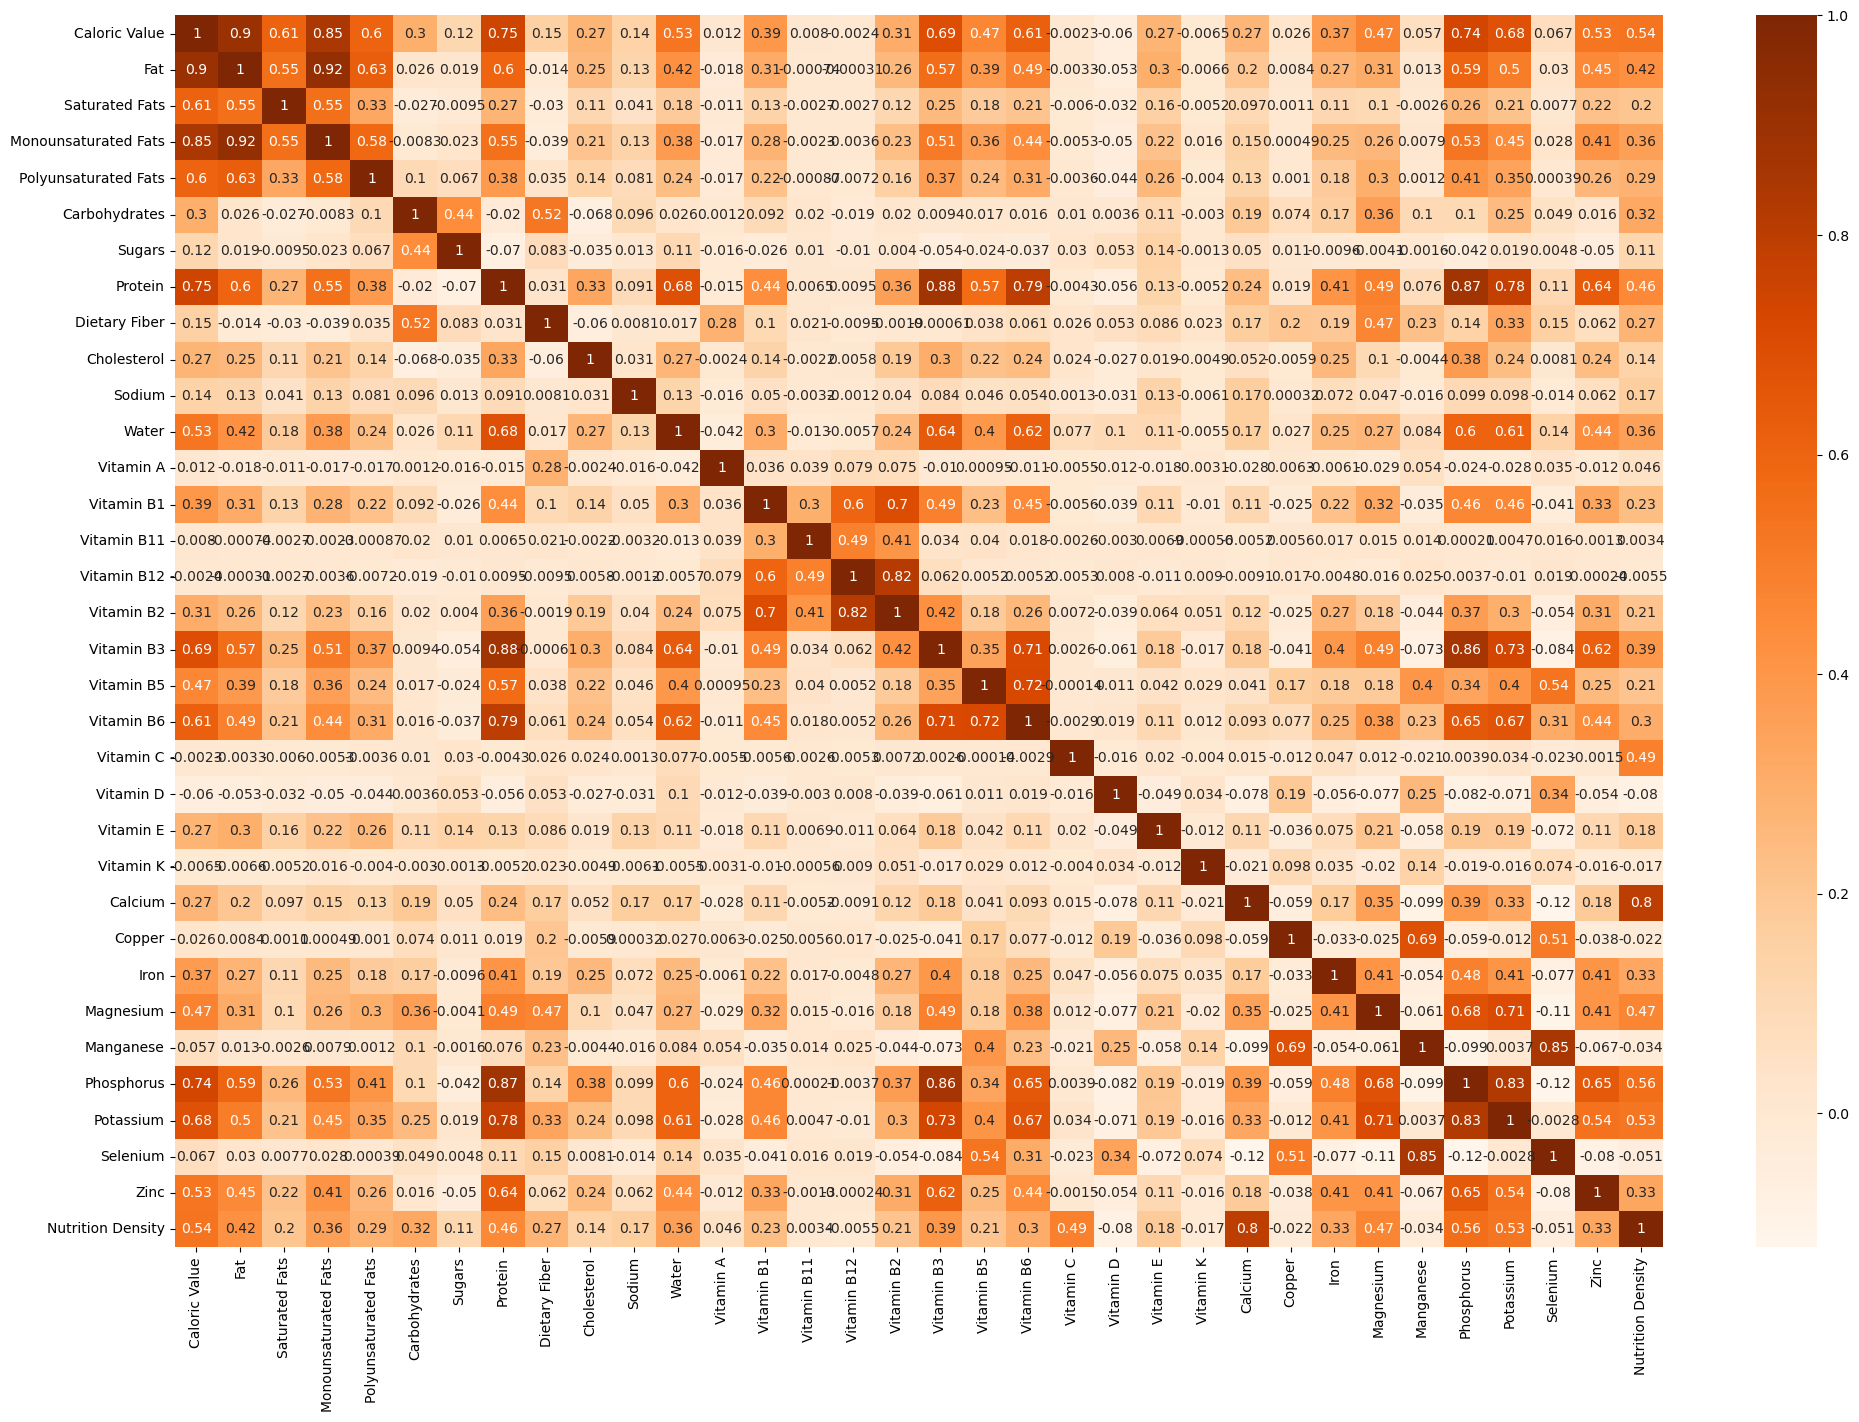

In [18]:
# To visualize the correlation between nutrient density and the other variables, I will create a heatmap using a correlation
# matrix.

food_correlation = food_nutrition.drop(['Food'], axis = 1).corr()
plt.figure(figsize = (24,16))
sns.heatmap(food_correlation, cmap = "Oranges", annot = True)
plt.show()

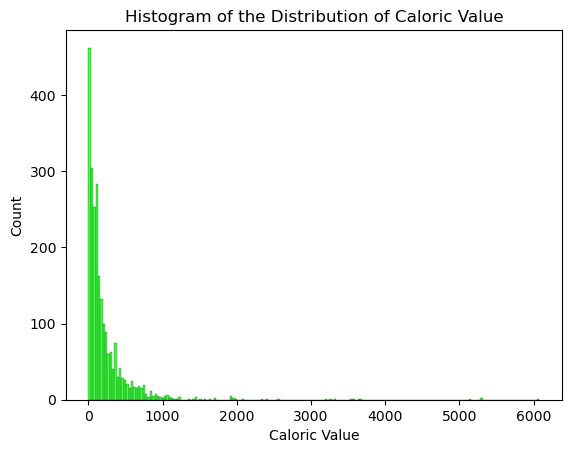

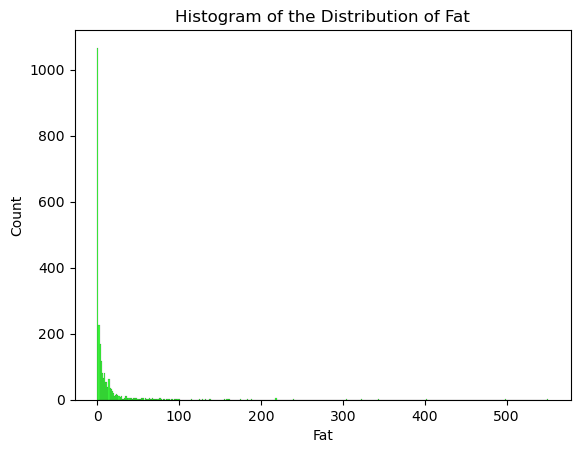

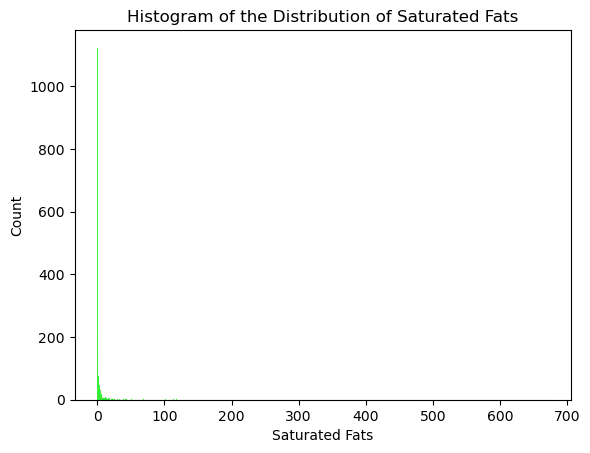

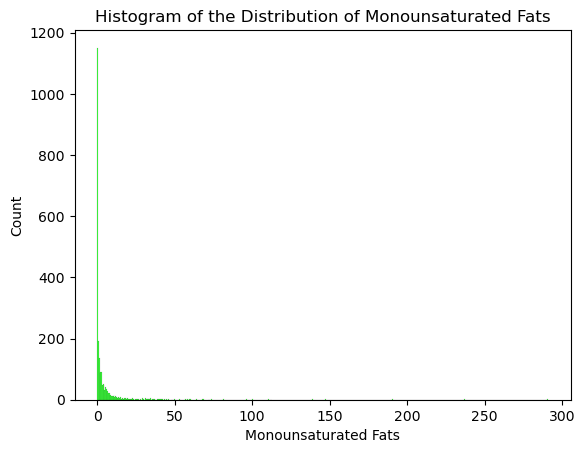

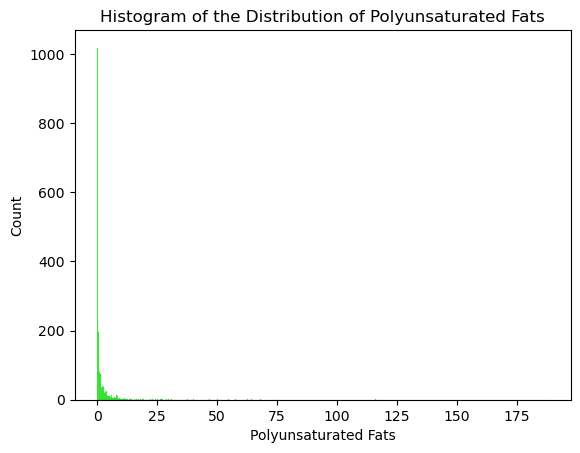

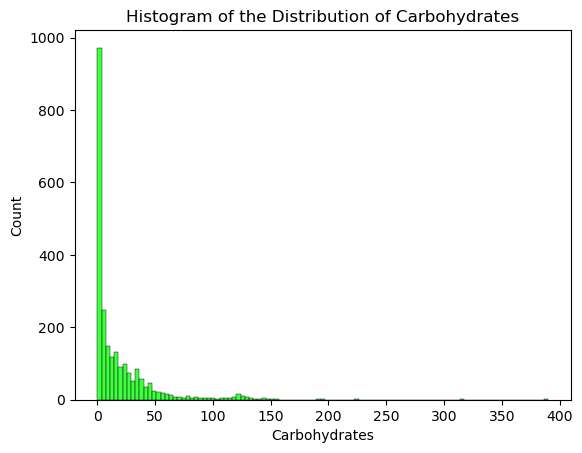

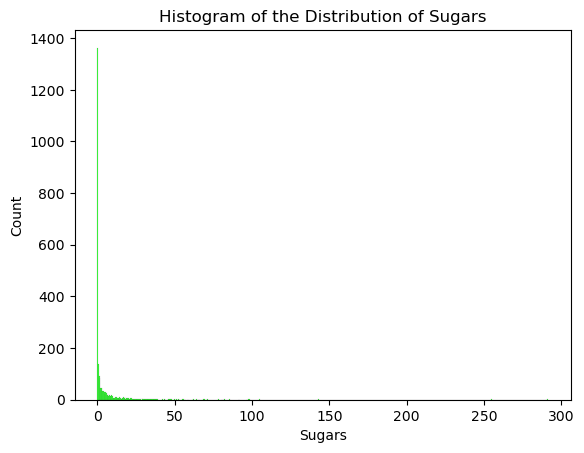

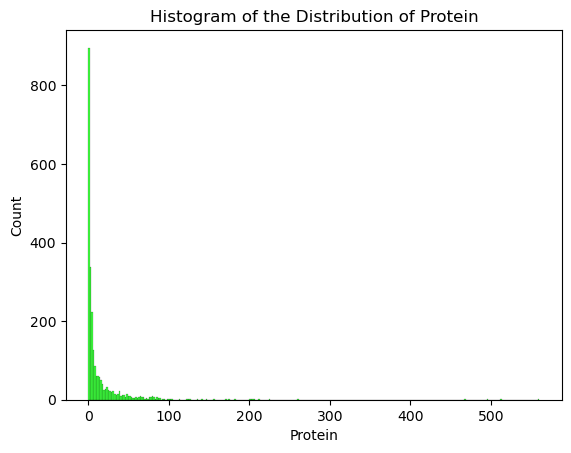

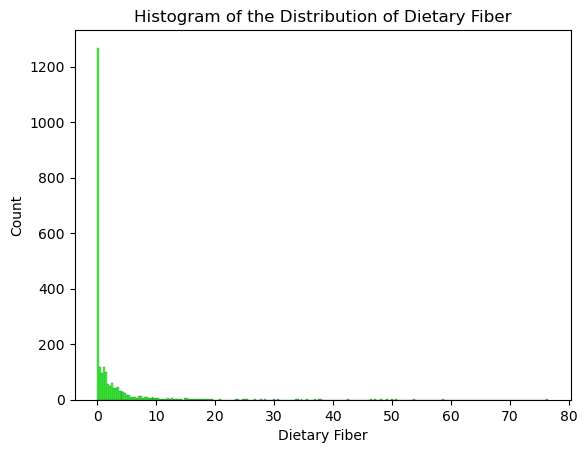

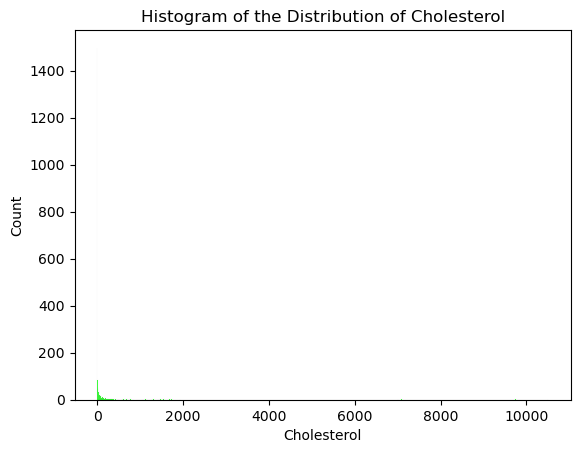

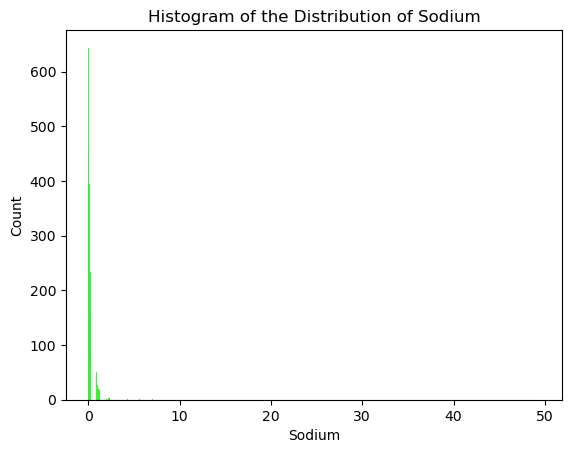

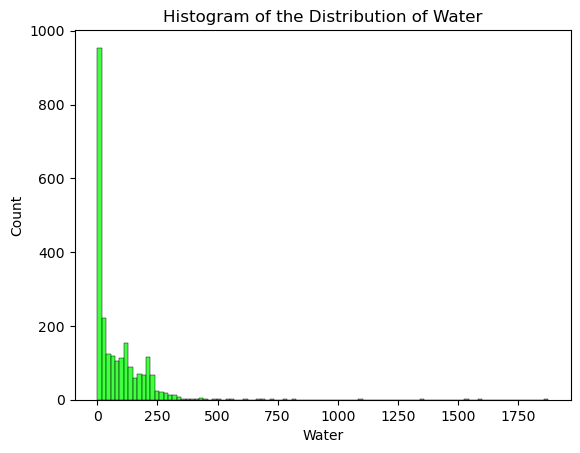

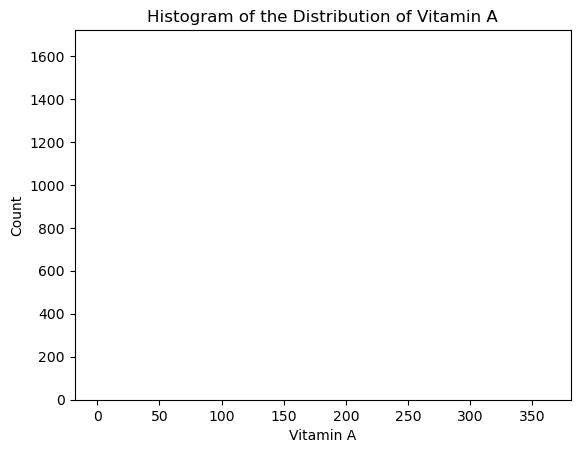

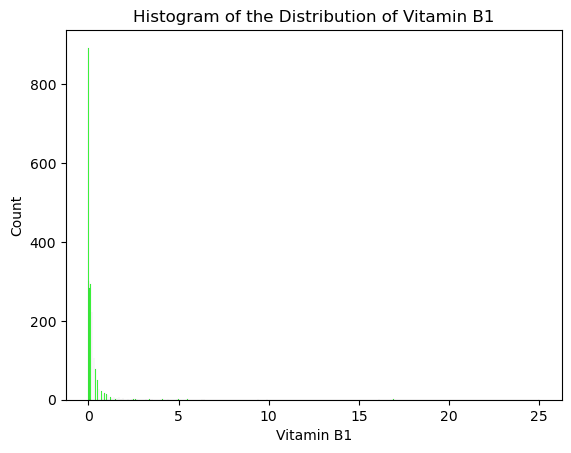

In [ ]:
# To visualize the distribution of the data, I will craft a for loop that will output a histogram for each variable except 
# for the Food variable. This will help to confirm if the initial model selection of ordinary least squares is appropriate. 
# Crafting the for loop involves me creating a function that outputs a histogram using Seaborn's histplot() function, which 
# takes in a DataFrame and a column.

def make_nutrient_histogram(data, col):
    sns.histplot(data[col], color = 'lime')
    plt.title(f'Histogram of the Distribution of {col}')
    plt.show()

for col in food_nutrition.drop(['Food'], axis = 1).columns:
    make_nutrient_histogram(food_nutrition, col)

In [ ]:
# To answer some potential questions that this study may yield at first glance, I'd like to see what foods are highest in 
# specific variables that are highly correlated with nutrition density. Since there are many variables within the dataset, I
# will extract the top twenty most positively correlated predictor variables to nutrient density. 

nutrient_density_corr = food_correlation['Nutrition Density']

top_20_nutrient_corr = nutrient_density_corr.drop('Nutrition Density').sort_values(ascending = False).head(20)

print(top_20_nutrient_corr)

In [ ]:
# I'd like to see the top ten food ingredients with their values for each of the highly correlated variables that have been 
# identified. 

for var in top_20_nutrient_corr.index:
    top_10_values = food_nutrition[[var, 'Food']].sort_values(by = var, ascending = False).head(10)

    plt.figure(figsize = (10, 6))
    plt.barh(top_10_values['Food'], top_10_values[var], color = 'blue')
    plt.xlabel(f'{var}')
    plt.ylabel('Food Ingredient')
    plt.title(f'Top 10 Food Ingredients for {var}')
    plt.gca().invert_yaxis()
    plt.show()

In [ ]:
# The final element of my exploratory data analysis, I wish to see the relationship between the top 20 highly correlated 
# variables and the Nutrition Density variable. This can be seen best on a scatter plot, which I will craft a function to 
# generate multiple scatter plots with a trend line and a for loop that creates the 20 scatter plots needed. 

def make_nutrient_scatter_plot(data, col1, col2):
    sns.lmplot(data = data, x = col1, y = col2, line_kws = {'color': 'red'}, scatter_kws = {'color': 'gray', 's': 5})
    plt.title(f'Scatter Plot of {col1} versus {col2}')
    plt.show()
    
for col in top_20_nutrient_corr.index:
    make_nutrient_scatter_plot(food_nutrition, 'Nutrition Density', col)

### Training and Test Set Split and Model Creation

In [ ]:
# The data is now ready to be split into training and test sets via train_test_split(). I have chosen an 80/20 ratio as this
# seems to be the standard across many data science projects.

nutrition_stats = food_nutrition.drop(columns = ['Food'], axis = 1)

nutrition_features = nutrition_stats.drop(columns = ['Nutrition Density'], axis = 1)
nutrition_density = nutrition_stats['Nutrition Density']

nutrition_xtrain, nutrition_xtest, nutrition_ytrain, nutrition_ytest = train_test_split(nutrition_features, 
                                                                                        nutrition_density, test_size = 0.2, 
                                                                                        random_state = 123)

# To ensure that the split has been made successfully, I will print the shapes of the training and test sets along with the 
# nutrition features and the nutrition density variable.

print(f'The shape of the nutrition features data is {nutrition_features.shape}.')
print(f'The shape of the nutrition density variable is {nutrition_density.shape}.')
print(f'The shape of the nutrition features training set is {nutrition_xtrain.shape}.')
print(f'The shape of the nutrition features test set is {nutrition_xtest.shape}.')
print(f'The shape of the nutrition density training set is {nutrition_ytrain.shape}.')
print(f'The shape of the nutrition density test set is {nutrition_ytest.shape}.')

In [ ]:
# As stated earlier, the first model will be an ordinary least squares model. Since many things need to happen within the 
# process of crafting the OLS model, I will encase everything needed into a class object and a function. The class object 
# will define the creation of the OLS model, the predictions that will come from the model, and the R-squared value, a 
# metric that can be used to see the percentage of variance within the data explained by the model. 

class OLSWrapper(BaseEstimator, RegressorMixin):
    def __init__(self):
        self.model = None
        
    def fit(self, X, y):
        X = sm.add_constant(X)
        self.model = sm.OLS(y, X).fit()
        print(self.model.summary())
        return self
    
    def predict(self, X):
        X = sm.add_constant(X)
        return self.model.predict(X)
    
    def score(self, X, y):
        predictions = self.predict(X)
        return 1 - np.sum((y - predictions) ** 2) / np.sum((y - np.mean(y)) ** 2)

# Now that the OLS Wrapper class object has been defined, I can craft my pipeline using the StandardScaler() and 
# OLSWrapper() functions.

pipe = Pipeline([('scale', StandardScaler()), ('model', OLSWrapper())])

# I need to set up a search space so that Ridge regression can be added to the model creation.

search_space = [{'model': [OLSWrapper()]},
               {'model': [Ridge(max_iter=10000)], 
                'model__alpha': np.logspace(-4, 4, 50)}]

# Using GridSearchCV(), I can create the grid search using the pipeline and search space, cross-validate the model created 
# five times (I am choosing 5 for the cross-validation 'cv' argument), and have the models all scored with the R-squared 
# value using the 'scoring' argument.

grid_search = GridSearchCV(pipe, search_space, cv = 5, scoring = 'r2')
gs = grid_search.fit(nutrition_xtrain, nutrition_ytrain)

# With the grid search fitting the data and cross-validating the OLS model normalized by Ridge regression five times, I will
# print the best estimator model by accessing the grid search attrributes. 

best_model = gs.best_estimator_
print(f'Best estimator: {best_model}')

# Now that the best OLS model can be shown, I can also display the model performance and significance statistics attached to
# it, those values being both R-squared and root mean squared error (RMSE).

pred = best_model.predict(nutrition_xtest)
r2 = r2_score(nutrition_ytest, pred)
rmse = np.sqrt(mean_squared_error(nutrition_ytest, pred))
print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")

In [ ]:
# Based on each of the five OLS model performances, we can see that they all are overfit by the perfect R-squared value of 
# 1.000 and the equally perfect Prob (F-Statistic) metric of 0.000. The best OLS estimator's performance metrics are also 
# indicative of overfitting as R-squared is almost 1.000 and the RMSE is almost zero, meaning that the model's predictions 
# are almost exactly the same as the actual observations. This fact rules out OLS as a viable model choice, which takes
# me to the stacking regressor method I have chosen as a backup consisting of a decision tree regressor, a random 
# forest regressor, and a gradient boosting regressor. I have encased the necessary model choices in a function that will 
# output the best-performing base model metrics and the features that are impactful to their results as well as the 
# statistics for the stacking regressor as a whole.

def run_ensemble_model():
    
# Here I have defined the regressors and attached the proper names to their functions via the estimators variable I created.
    
    tree = DecisionTreeRegressor(random_state = 123)
    forest = RandomForestRegressor(random_state = 123)
    booster = GradientBoostingRegressor(random_state = 123)
    
    param_grid_tree = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
    param_grid_forest = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
    param_grid_booster = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}

    grid_search_tree = GridSearchCV(tree, param_grid_tree, cv = 5)
    grid_search_forest = GridSearchCV(forest, param_grid_forest, cv = 5)
    grid_search_booster = GridSearchCV(booster, param_grid_booster, cv = 5)

    grid_search_tree.fit(nutrition_xtrain, nutrition_ytrain)
    grid_search_forest.fit(nutrition_xtrain, nutrition_ytrain)
    grid_search_booster.fit(nutrition_xtrain, nutrition_ytrain)

    best_tree = grid_search_tree.best_estimator_
    best_forest = grid_search_forest.best_estimator_
    best_booster = grid_search_booster.best_estimator_

    estimators = [('Decision Tree', best_tree), ('Random Forest', best_forest), ('Gradient Boosting', best_booster)]

# The stacking regressor function is then filed with my chosen models and set to perform a five-fold cross-validation. 
# Predictions are made using both the training and test sets.
    
    stacking_reg = StackingRegressor(estimators = estimators, cv = 5)
    stacking_reg.fit(nutrition_xtrain, nutrition_ytrain)
    ypred_train = stacking_reg.predict(nutrition_xtrain)
    ypred_test = stacking_reg.predict(nutrition_xtest)
    
# I have crafted two for loops: one that allows the printing of the best estimator for each model choice along with the 
# RMSE and R-squared values, and one that outputs the model's top five most important features along with their 
# corresponding coefficients.
    
    print("Best performing base estimators and their performance metrics:")
    for name, model in stacking_reg.named_estimators_.items():
        print(f"\n{name} Best Estimator:\n")
        print(model.get_params())
        
        ypred = model.predict(nutrition_xtest)
        rmse = np.sqrt(mean_squared_error(nutrition_ytest, ypred))
        r2 = r2_score(nutrition_ytest, ypred)
        print(f"\nPerformance Metrics for {name}:\n")
        print(f"     RMSE: {rmse}")
        print(f"     R-squared: {r2}")
        
        importances = model.feature_importances_
        feature_names = nutrition_xtrain.columns
        sorted_indices = np.argsort(importances)[::-1]
        print("\nFeature importances:\n")
        for idx in sorted_indices[:5]:
            print(f"     {feature_names[idx]}: {importances[idx]:.4f}")
    
# The final block of code in the stacking regressor function is meant to display the performance metrics of the stacking 
# regressor, which starts with the creation of the decision tree model, allows the random forest model to be made using the
# information learned from the decision tree, and ends with the gradient boosting regressor turning several weak decision 
# trees and random forests into a strong stacked ensemble model.

    rmse = np.sqrt(mean_squared_error(nutrition_ytest, ypred_test))
    r2 = r2_score(nutrition_ytest, ypred_test)
    print('\nStacking regressor performance metrics:\n')
    print(f'     RMSE: {rmse}')
    print(f'     R-squared: {r2}')
    
run_ensemble_model()

In [ ]:
# The stacking regressor proved much more viable in modeling the food nutrition data, with each model within the stacking
# regressor performing better than the previous model choice. With the RMSE values rather low in regards to the nutrition 
# density variable's observations and the R-squared values explaining a large percentage of variance within the data as 
# shown by their close proximity to 1, the stacking regressor is the best model choice out of the five models crafted. 
# This can be confirmed with the very high R-squared value of 0.978 and the low RMSE value of 24.65 as it relates to the 
# nutrition density variable. Looking at the factors that were considered important features to the creation of these models
# allows the definition of three consistent variables across the decision tree, random forest, and gradient boosting base 
# models: Calcium, Vitamin C, and Caloric Value. As they relate to nutrition density, these variables have a verified 
# impact. Checking back with the heatmap created in the EDA stage confirmed that some of these important features also had 
# the highest positively correlated coefficients, allowing dieticians and nutritionists to begin recommending foods that 
# are high in those vitamins, minerals, and nutrients. 

In [ ]:
# To answer some of the questions put forth in the draft paper, I will output the answers here to showcase them in the final
# presentation of the project. 

# This bar chart will answer the question of the food ingredient with the highest nutrition density. 

top_10_foods = food_nutrition.sort_values(by = 'Nutrition Density', ascending = False).head(10)

food_names = top_10_foods['Food']
nutrition_values = top_10_foods['Nutrition Density']

plt.figure(figsize=(12, 6))
plt.bar(food_names, nutrition_values, color = 'orange')
plt.title('Top 10 Food Ingredients by Nutrition Density')
plt.xlabel('Food Ingredient')
plt.ylabel('Nutrition Density')
plt.xticks(rotation=45, ha='right')
plt.show()